In [2]:

import os
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import tensorflow_addons as tfa

from sklearn.metrics import *
import scikitplot as skplt

from functools import partial
import albumentations as A
import matplotlib.pyplot as plt
import seaborn as sns

AUTOTUNE = tf.data.experimental.AUTOTUNE



In [92]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater

def ShowImage(title,img,ctype):
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.title(title)
  plt.show()

In [111]:
import glob
import os
files = glob.glob('D:\\semester3\\dataset_project\\breast\\benign\\SOB\\**\\**\\**\\*.png',recursive = True)
parent_path = 'D:\\semester3\\test\\benign\\SOB'
for f in files:
    if 'adenosis' in f:
        directory = 'adenosis'
        path = os.path.join(parent_path, directory)
        try:
            os.makedirs(path, exist_ok = True)
        except OSError as error:
            print("Directory '%s' can not be created" % directory)
        if 'SOB_B_A_14-22549AB' in f:
            path_1 = os.path.join(path, 'SOB_B_A_14-22549AB')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)                   
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        elif 'SOB_B_A_14-22549CD' in f:
            path_1 = os.path.join(path, 'SOB_B_A_14-22549CD')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)   
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)   
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)   
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)   
        elif 'SOB_B_A_14-22549G' in f:
            path_1 = os.path.join(path, 'SOB_B_A_14-22549G')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        elif 'SOB_B_A_14-29960CD' in f:
            path_1 = os.path.join(path, 'SOB_B_A_14-29960CD')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
    elif 'fibroadenoma' in f:
        directory = 'fibroadenoma'
        path = os.path.join(parent_path, directory)
        try:
            os.makedirs(path, exist_ok = True)
        except OSError as error:
            print("Directory '%s' can not be created" % directory)
        if 'SOB_B_F_14-9133' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-9133')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        if 'SOB_B_F_14-14134' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-14134')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_F_14-14134E' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-14134E')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_F_14-21998CD' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-21998CD')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_F_14-21998EF' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-21998EF')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_F_14-23060AB' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-23060AB')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_F_14-23060CD' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-23060CD')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_F_14-23222AB' in f:
            path_1 = os.path.join(path,'SOB_B_F_14-23222AB')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_F_14-25197' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-25197')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_F_14-29960AB' in f:
            path_1 = os.path.join(path, 'SOB_B_F_14-29960AB')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
    elif 'phyllodes_tumor' in f:
        directory = 'phyllodes_tumor'
        path = os.path.join(parent_path, directory)
        try:
            os.makedirs(path, exist_ok = True)
        except OSError as error:
            print("Directory '%s' can not be created" % directory)
        if 'SOB_B_PT_14-21998AB' in f:
            path_1 = os.path.join(path, 'SOB_B_PT_14-21998AB')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 

            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 

            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 

            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        elif 'SOB_B_PT_14-22704' in f:
                 
            path_1 = os.path.join(path, 'SOB_B_PT_14-22704')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        elif 'SOB_B_PT_14-29315EF' in f:
            path_1 = os.path.join(path, 'SOB_B_PT_14-29315EF')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
    elif 'tubular_adenoma' in f:
        directory = 'tubular_adenoma'
        path = os.path.join(parent_path, directory)
        try:
            os.makedirs(path, exist_ok = True)
        except OSError as error:
            print("Directory '%s' can not be created" % directory)
        if 'SOB_B_TA_14-3411F' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-3411F')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_TA_14-13200' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-13200')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked)
        if 'SOB_B_TA_14-15275' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-15275')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_TA_14-16184' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-16184')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_TA_14-16184CD' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-16184CD')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_TA_14-19854C' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-19854C')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
        if 'SOB_B_TA_14-21978AB' in f:
            path_1 = os.path.join(path, 'SOB_B_TA_14-21978AB')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                path_2 = os.path.join(path_1, '40X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '400X' in f:
                path_2 = os.path.join(path_1, '400X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '200X' in f:
                path_2 = os.path.join(path_1, '200X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 
            if '100X' in f:
                path_2 = os.path.join(path_1, '100X')
                try:
                    os.makedirs(path_2, exist_ok = True)
                    print("Directory '%s' created successfully" % directory)
                except OSError as error:
                    print("Directory '%s' can not be created" % directory)
                r = f.split('\\')
                filename = r[-1]                    
                #Read in image
                filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
                gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                #Threshold the image to binary using Otsu's method
                ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                cv2.imwrite(os.path.join(path_2 , r[-1]), masked) 

      
            
            
            
        
        

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created successfully
Directory 'adenosis' created succe

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created s

Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'fibroadenoma' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'ph

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes_tumor' created successfully
Directory 'phyllodes

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_adenoma' created successfully
Directory 'tubular_a

In [3]:
def get_mask(path,magnification):
    path_2 = os.path.join(path, magnification)
    try:
        os.makedirs(path_2, exist_ok = True)
        print("Directory '%s' created successfully" % directory)
    except OSError as error:
        print("Directory '%s' can not be created" % directory)
    r = f.split('\\')
    filename = r[-1]                    
    #Read in image
    filename_1        = cv2.imread(f)
#               ShowImage('Original',filename_1,'bgr')
    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
    #Threshold the image to binary using Otsu's method
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)    

In [96]:
import glob
import os
files = glob.glob('D:\\semester3\\dataset_project\\breast\\malignant\\SOB\\**\\**\\**\\*.png',recursive = True)
parent_path = 'D:\\semester3\\test\\malignant\\SOB'
for f in files:
    if 'ductal_carcinoma' in f:
        directory = 'ductal_carcinoma'
        path = os.path.join(parent_path, directory)
        try:
            os.makedirs(path, exist_ok = True)
        except OSError as error:
            print("Directory '%s' can not be created" % directory)
        if 'SOB_M_DC_14-2523' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-2523')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
 
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
                
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-2773' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-2773')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
                
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        if 'SOB_M_DC_14-2980' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-2980')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        if 'SOB_M_DC_14-2985' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-2985')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        if 'SOB_M_DC_14-3909' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-3909')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-4364' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-4364')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-4372' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-4372')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-5287' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-5287')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-5694' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-5694')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-5695' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-5695')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-6241' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-6241')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-8168' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-8168')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-9461' in f: 
            path_1 = os.path.join(path, 'SOB_M_DC_14-9461')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-10926' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-10926')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-11031' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-11031')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-11520' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-11520')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-11951' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-11951')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-12312' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-12312')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-13412' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-13412')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-13993' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-13993')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-14015' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-14015')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-14926' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-14926')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-14946' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-14946')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-15572' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-15572')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-15696' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-15696')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-15792' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-15792')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-16188' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-16188')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-16336' in f:  
            path_1 = os.path.join(path, 'SOB_M_DC_14-16336')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-16448' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-16448')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-16601' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-16601')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-16716' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-16716')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-16875' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-16875')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-17614' in f: 
            path_1 = os.path.join(path, 'SOB_M_DC_14-17614')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-17901' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-17901')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-17915' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-17915')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-18650' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-18650')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-20629' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-20629')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_DC_14-20636' in f:
            path_1 = os.path.join(path, 'SOB_M_DC_14-20636')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

    elif 'lobular_carcinoma' in f:
        directory = 'lobular_carcinoma'
        path = os.path.join(parent_path, directory)
        try:
            os.makedirs(path, exist_ok = True)
        except OSError as error:
            print("Directory '%s' can not be created" % directory)
        if 'SOB_M_LC_14-12204' in f:
            path_1 = os.path.join(path, 'SOB_M_LC_14-12204')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_LC_14-13412' in f:
            path_1 = os.path.join(path, 'SOB_M_LC_14-13412')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_LC_14-15570' in f:
            path_1 = os.path.join(path, 'SOB_M_LC_14-15570')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_LC_14-15570C' in f:
            path_1 = os.path.join(path, 'SOB_M_LC_14-15570C')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
         
        if 'SOB_M_LC_14-16196' in f:
            path_1 = os.path.join(path, 'SOB_M_LC_14-16196')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

    elif 'mucinous_carcinoma' in f:
        directory = 'mucinous_carcinoma'
        path = os.path.join(parent_path, directory)
        try:
            os.makedirs(path, exist_ok = True)
        except OSError as error:
            print("Directory '%s' can not be created" % directory)
        if 'SOB_M_MC_14-10147' in f:
            path_1 = os.path.join(path, 'SOB_M_MC_14-10147')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        if 'SOB_M_MC_14-12773' in f:
            path_1 = os.path.join(path, 'SOB_M_MC_14-12773')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        if 'SOB_M_MC_14-13413' in f:
            path_1 = os.path.join(path, 'SOB_M_MC_14-13413')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        if 'SOB_M_MC_14-13418DE' in f:
            path_1 = os.path.join(path, 'SOB_M_MC_14-13418DE')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        if 'SOB_M_MC_14-16456' in f:
            path_1 = os.path.join(path, 'SOB_M_MC_14-16456')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        if 'SOB_M_MC_14-18842' in f:
            path_1 = os.path.join(path, 'SOB_M_MC_14-18842')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        if 'SOB_M_MC_14-18842D' in f:
            path_1 = os.path.join(path, 'SOB_M_MC_14-18842D')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        if 'SOB_M_MC_14-19979' in f:
            path_1 = os.path.join(path, 'SOB_M_MC_14-19979')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
        if 'SOB_M_MC_14-19979C' in f:
            path_1 = os.path.join(path, 'SOB_M_MC_14-19979C')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
    elif 'papillary_carcinoma' in f:
        directory = 'papillary_carcinoma'
        path = os.path.join(parent_path, directory)
        try:
            os.makedirs(path, exist_ok = True)
        except OSError as error:
            print("Directory '%s' can not be created" % directory)
        if 'SOB_M_PC_14-9146' in f:
            path_1 = os.path.join(path, 'SOB_M_PC_14-9146')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_PC_14-12465' in f:
            path_1 = os.path.join(path, 'SOB_M_PC_14-12465')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_PC_14-15687B' in f:
            path_1 = os.path.join(path, 'SOB_M_PC_14-15687B')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_PC_14-15704' in f:
            path_1 = os.path.join(path, 'SOB_M_PC_14-15704')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_PC_14-19440' in f:
            path_1 = os.path.join(path, 'SOB_M_PC_14-19440')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        if 'SOB_M_PC_15-190EF' in f:
            path_1 = os.path.join(path, 'SOB_M_PC_15-190EF')
            try:
                os.makedirs(path_1, exist_ok = True)
            except OSError as error:
                print("Directory '%s' can not be created" % directory)
            if '40X' in f:
                    path_2 = os.path.join(path_1,'40X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '100X' in f:
                    path_2 = os.path.join(path_1,'100X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '400X' in f:
                    path_2 = os.path.join(path_1,'400X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  
            if '200X' in f:
                    path_2 = os.path.join(path_1,'200X')
                    try:
                        os.makedirs(path_2, exist_ok = True)
                        print("Directory '%s' created successfully" % directory)
                    except OSError as error:
                        print("Directory '%s' can not be created" % directory)
                    r = f.split('\\')
                    filename = r[-1]                    
                    #Read in image
                    filename_1        = cv2.imread(f)
                #               ShowImage('Original',filename_1,'bgr')
                    gray        = cv2.cvtColor(filename_1,cv2.COLOR_BGR2GRAY)
                    #Threshold the image to binary using Otsu's method
                    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                    cell_hsvmin  = (80,20,20)  #Lower end of the HSV range defining the nuclei
                    cell_hsvmax  = (150,190,190) #Upper end of the HSV range defining the nuclei
                    hsv          = cv2.cvtColor(filename_1,cv2.COLOR_BGR2HSV) 
                    color_thresh = cv2.inRange(hsv, cell_hsvmin, cell_hsvmax)
                    masked = cv2.bitwise_and(filename_1,filename_1, mask=color_thresh)
                    cv2.imwrite(os.path.join(path_2 , r[-1]), masked)  

        

            
        
               

Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created success

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carci

Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully
Directory 'ductal_carcinoma' created successfully


Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' created successfully
Directory 'lobular_carcinoma' c

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'mucinous_carcinoma' created successfully
Directory 'm

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created successfully
Directory 'papillary_carcinoma' created succes

In [99]:
data = pd.read_csv('D:/semester3/test/output2.csv')
img_dir = 'D:/semester3/test/'
class_names = ['benign', 'malignant']

In [100]:
data = data.rename(columns={'filename':'path'})
data['label'] = data.path.apply(lambda x: x.split('/')[3])
data['label_int'] = data.label.apply(lambda x: class_names.index(x))
data['filename'] = data.path.apply(lambda x: x.split('/')[-1])
data.head(3)

fold  mag    grp                                               path  \
0     1  100  train  BreaKHis_v2/histology_slides/breast/benign/SOB...   
1     1  100  train  BreaKHis_v2/histology_slides/breast/benign/SOB...   
2     1  100  train  BreaKHis_v2/histology_slides/breast/benign/SOB...   

    label  label_int                        filename  
0  benign          0  SOB_B_A-14-22549AB-100-001.png  
1  benign          0  SOB_B_A-14-22549AB-100-002.png  
2  benign          0  SOB_B_A-14-22549AB-100-003.png

In [46]:
data.to_csv('D:/semester3/test/updated_fold.csv')

In [3]:
data_updated = pd.read_csv('D:/semester3/test/updated_fold.csv')

Count of Benign    :  12400
Count of Malignant :  27145


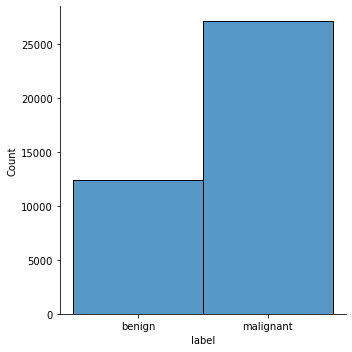

In [18]:
ax = sns.displot(data=data_updated, x=data_updated['label'])
print('Count of Benign    : ', data_updated[data_updated.label == 'benign'].label.count())
print('Count of Malignant : ', data_updated[data_updated.label == 'malignant'].label.count())

In [19]:

test_df = data_updated.groupby('label').sample(n=300)
train_df = data_updated.drop(test_df.index).reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# split training and validation set
valid_df = train_df.sample(frac=0.2)
train_df = train_df.drop(valid_df.index).reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

test_df['set'] = 'test'
train_df['set'] = 'train'
valid_df['set'] = 'valid'
data_new = pd.concat([train_df,valid_df, test_df])
print(data_new)

# ax = sns.displot(data=data_new, x='label', col='set')

print('Training set')
print(train_df.label.value_counts())

print('\nValidation set')
print(valid_df.label.value_counts())

print('\nTest set')
print(test_df.label.value_counts())

     Unnamed: 0  fold  mag    grp  \
0             0     1  100  train   
1             1     1  100  train   
2             2     1  100  train   
3             5     1  100  train   
4             6     1  100  train   
..          ...   ...  ...    ...   
595       34579     5  200  train   
596       27098     4  400  train   
597       34941     5  100  train   
598       37734     5   40   test   
599       33587     5  200  train   

                                                  path      label  label_int  \
0    BreaKHis_v2/histology_slides/breast/benign/SOB...     benign          0   
1    BreaKHis_v2/histology_slides/breast/benign/SOB...     benign          0   
2    BreaKHis_v2/histology_slides/breast/benign/SOB...     benign          0   
3    BreaKHis_v2/histology_slides/breast/benign/SOB...     benign          0   
4    BreaKHis_v2/histology_slides/breast/benign/SOB...     benign          0   
..                                                 ...        ...        ..

In [30]:
print(train_df.label.value_counts())

benign       21467
malignant    21467
Name: label, dtype: int64


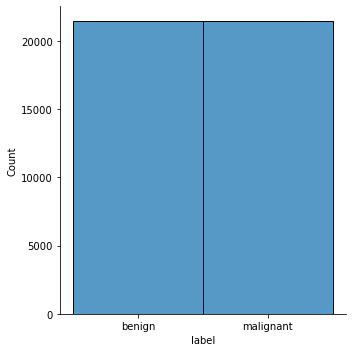

In [31]:
# upsampling training dataset
max_count = np.max(train_df.label.value_counts())
min_count = np.min(train_df.label.value_counts())
train_df = train_df.groupby('label').sample(n=max_count, replace=True)
train_df = train_df.reset_index(drop=True)
train_df.label.value_counts()

ax = sns.displot(data=train_df, x=train_df['label'])

In [38]:
train_df

Unnamed: 0  fold  mag    grp  \
0           13511     2   40   test   
1           33041     5  400  train   
2           15992     3  200  train   
3           36513     5  200   test   
4           37082     5  100   test   
...           ...   ...  ...    ...   
42929       34080     5  100  train   
42930       22030     3   40   test   
42931       26201     4  100  train   
42932       28277     4   40  train   
42933       22811     3  100   test   

                                                    path      label  \
0      BreaKHis_v2/histology_slides/breast/benign/SOB...     benign   
1      BreaKHis_v2/histology_slides/breast/benign/SOB...     benign   
2      BreaKHis_v2/histology_slides/breast/benign/SOB...     benign   
3      BreaKHis_v2/histology_slides/breast/benign/SOB...     benign   
4      BreaKHis_v2/histology_slides/breast/benign/SOB...     benign   
...                                                  ...        ...   
42929  BreaKHis_v2/histology_slides/breast/malignant/...  malignant   
42930  BreaKHis_v2/histology_slides/breast/malignant/...  malignant   
42931  BreaKHis_v2/histology_slides/breast/malignant/...  malignant   
42932  BreaKHis_v2/histology_slides/breast/malignant/...  malignant   
42933  BreaKHis_v2/histology_slides/breast/malignant/...  malignant   

       label_int                         filename    set  
0              0     SOB_B_A-14-22549G-40-031.png  train  
1              0  SOB_B_TA-14-21978AB-400-010.png  train  
2              0    SOB_B_A-14-22549G-200-020.png  train  
3              0   SOB_B_A-14-22549AB-200-022.png  train  
4              0  SOB_B_PT-14-21998AB-100-048.png  train  
...          ...                              ...    ...  
42929          1    SOB_M_DC-14-17915-100-015.png  train  
42930          1     SOB_M_DC-14-12312-40-027.png  train  
42931          1    SOB_M_DC-14-15572-100-015.png  train  
42932          1     SOB_M_MC-14-13413-40-022.png  train  
42933          1     SOB_M_DC-14-6241-100-007.png  train  

[42934 rows x 9 columns]

In [47]:
len(train_df)

42934

In [74]:
gkk = train_df.groupby(['label', 'mag'])

In [75]:
gkk.first()

Unnamed: 0  fold    grp  \
label     mag                            
benign    40        13511     2   test   
          100       37082     5   test   
          200       15992     3  train   
          400       33041     5  train   
malignant 40         2248     1  train   
          100       28472     4  train   
          200       14858     2   test   
          400        7254     1   test   

                                                            path  label_int  \
label     mag                                                                 
benign    40   BreaKHis_v2/histology_slides/breast/benign/SOB...          0   
          100  BreaKHis_v2/histology_slides/breast/benign/SOB...          0   
          200  BreaKHis_v2/histology_slides/breast/benign/SOB...          0   
          400  BreaKHis_v2/histology_slides/breast/benign/SOB...          0   
malignant 40   BreaKHis_v2/histology_slides/breast/malignant/...          1   
          100  BreaKHis_v2/histology_slides/breast/malignant/...          1   
          200  BreaKHis_v2/histology_slides/breast/malignant/...          1   
          400  BreaKHis_v2/histology_slides/breast/malignant/...          1   

                                      filename    set  
label     mag                                          
benign    40      SOB_B_A-14-22549G-40-031.png  train  
          100  SOB_B_PT-14-21998AB-100-048.png  train  
          200    SOB_B_A-14-22549G-200-020.png  train  
          400  SOB_B_TA-14-21978AB-400-010.png  train  
malignant 40      SOB_M_DC-14-14946-40-030.png  train  
          100   SOB_M_MC-14-19979C-100-002.png  train  
          200     SOB_M_DC-14-2985-200-014.png  train  
          400    SOB_M_LC-14-13412-400-007.png  train

In [39]:
train_loader_benign = tf.data.Dataset.from_tensor_slices((img_dir+train_df.path, train_df.label_int==0))

In [40]:
len(os.listdir(train_loader_benign ))

TypeError: listdir: path should be string, bytes, os.PathLike or None, not TensorSliceDataset

In [112]:
train_loader = tf.data.Dataset.from_tensor_slices((img_dir+train_df.path, train_df.label_int))
valid_loader = tf.data.Dataset.from_tensor_slices((img_dir+valid_df.path, valid_df.label_int))

In [113]:
test_loader=tf.data.Dataset.from_tensor_slices((img_dir+test_df.path, test_df.label_int))


In [114]:
model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/1",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/1",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/1",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/1",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/1",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/1",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/1",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/1",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/1",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/1",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/1",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/1",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature_vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

In [115]:
model_name = 'efficientnetv2-b0'
model_handle = model_handle_map.get(model_name)
IMAGE_SIZE = model_image_size_map.get(model_name, 224)
BATCH_SIZE = 64
EPOCHS = 12
SAMPLE_SIZE = len(train_df)

print(f"Selected model: {model_name} : {model_handle}")
print(f"Input size {IMAGE_SIZE}")

Selected model: efficientnetv2-b0 : https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2
Input size 224


In [116]:
def parse_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    return img, label

In [117]:
def resize_rescale(image, label):
    img = tf.cast(image, tf.float32)
    img = tf.image.resize(img, [IMAGE_SIZE, IMAGE_SIZE])/255
    return img, label

In [118]:
train_loader = tf.data.Dataset.from_tensor_slices((img_dir+train_df.path, train_df.label_int))
valid_loader = tf.data.Dataset.from_tensor_slices((img_dir+valid_df.path, valid_df.label_int))

train_ds = (
    train_loader.shuffle(len(train_df))
    .map(parse_image, num_parallel_calls=AUTOTUNE)
#     .map(partial(augmentor),num_parallel_calls=AUTOTUNE)
    .map(resize_rescale, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE) 
)
valid_ds = (
    valid_loader.shuffle(len(valid_df))
    .map(parse_image, num_parallel_calls=AUTOTUNE)
    .map(resize_rescale, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .prefetch(AUTOTUNE)
)

In [119]:
def build_network(image_size):
    print('building model...')
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(image_size, image_size, 3)),
        hub.KerasLayer(model_handle, trainable=True, name='base_model'),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid', name='classifier') 
    ],name=model_name)
    model.build((None, image_size, image_size, 3))
    model.summary()
    print('model loaded!!!')
    return model

In [ ]:
tf.keras.backend.clear_session()
model = build_network(IMAGE_SIZE)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
clr_scheduler = tfa.optimizers.CyclicalLearningRate( 
    initial_learning_rate=2e-1,  maximal_learning_rate=7e-3, 
    step_size=3*(SAMPLE_SIZE//BATCH_SIZE),  
    scale_fn=lambda x: 1 / (2.0 ** (x - 1)), 
    scale_mode='cycle'
)
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
]

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=clr_scheduler) , 
    loss=tf.keras.losses.BinaryCrossentropy(), 
    metrics=METRICS
)

history = model.fit(
    train_ds, 
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    callbacks = [checkpoint_cb],
    validation_data=valid_ds,
)
training_history(history.history)

building model...
Model: "efficientnetv2-b0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_model (KerasLayer)     (None, 1280)              5919312   
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)               

In [ ]:
test_df = test_df.sample(frac=1).reset_index(drop=True)
test_ds = tf.data.Dataset.from_tensor_slices(img_dir+test_df.path) 
test_ds = test_ds.map(decode_test,num_parallel_calls=AUTOTUNE).batch(len(test_df))
test_img = next(iter(test_ds))
test_index = test_df.label_int.values
test_label = test_df.label.values

test_pred = model.predict(test_ds)
pred_index = np.round(test_pred).astype('uint8')
pred_label = np.array(class_names)[pred_index]

print(classification_report(test_index, pred_index, target_names=class_names,zero_division=0))
print('f1_score        :', f1_score(test_index, pred_index, average='micro'))
print('accuracy_score  :', accuracy_score(test_index, pred_index))

cm = skplt.metrics.plot_confusion_matrix(test_label, pred_label, figsize=(8, 8), normalize=False)

In [43]:
IMG_SHAPE  = 224
batch_size = 32

In [45]:
import os
import cv2
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
# from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [46]:
image_gen_train = ImageDataGenerator(rescale = 1./255)
train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
directory = train_loader,
shuffle= True,
target_size = (IMG_SHAPE,IMG_SHAPE),
class_mode = 'binary')
image_generator_validation = ImageDataGenerator(rescale=1./255)
val_data_gen = image_generator_validation.flow_from_directory(batch_size=batch_size,
directory=valid_dir,
target_size=(IMG_SHAPE, IMG_SHAPE),
class_mode='binary')
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size,
directory=test_dir,
target_size=(IMG_SHAPE, IMG_SHAPE),
class_mode='binary')

TypeError: listdir: path should be string, bytes, os.PathLike or None, not TensorSliceDataset

In [ ]:

# reading the CSV file
text = open('D:/semester3/test/Folds.csv', "r")
  
#join() method combines all contents of 
# csvfile.csv and formed as a string
text = ''.join([i for i in text]) 
  
# search and replace the contents
text = text.replace("BreaKHis_v1", "BreaKHis_v2") 

# output.csv is the output file opened in write mode
x = open("D:/semester3/test/output2.csv","w")
  
# all the replaced text is written in the output.csv file
x.writelines(text)
x.close()
